# BL40A2010 Introduction to IoT-Based Systems

## Assignment 5, 01.10.2020

### Author: Kristen Sirel

**(1) Create two arrays with 10000 samples generated as [Binomial](https://en.wikipedia.org/wiki/Binomial_distribution) random variables via [Numpy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.binomial.html) similar to what we have done with Poisson random variables in the tutorial considering the following paramenters of the Binomial function:**

**(a) $n=100$ and $p=0.3$;**

**(b) $n=10000$, and $p=0.6$**


**Make the histogram (empirical) plots related to each vector and compare them with the analytical results with the probability distribution funtion given by:**

**$$\mathrm{Prob}\left[X = k \right] = \binom{n}{k}p^k(1-p)^{n-k},$$ where $k$ is the number of *successes* in $n$ trials.**

**Remember to use this [scipy.stats.binom](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.binom.html) in a similar way we did in the tutorial with Poisson.**

In [14]:
!pip install -r requirements.txt
!pip install --upgrade networkx
!pip installl scipy
!pip install --upgrade networkx
!pip install --upgrade scipy

import networkx as nx
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.stats import poisson
from scipy.stats import binom
style.use('bmh')
import warnings
warnings.filterwarnings('ignore')

Requirement already up-to-date: networkx in /srv/conda/envs/notebook/lib/python3.7/site-packages (2.5)
ERROR: unknown command "installl" - maybe you meant "install"
Requirement already up-to-date: networkx in /srv/conda/envs/notebook/lib/python3.7/site-packages (2.5)
Requirement already up-to-date: scipy in /srv/conda/envs/notebook/lib/python3.7/site-packages (1.5.2)


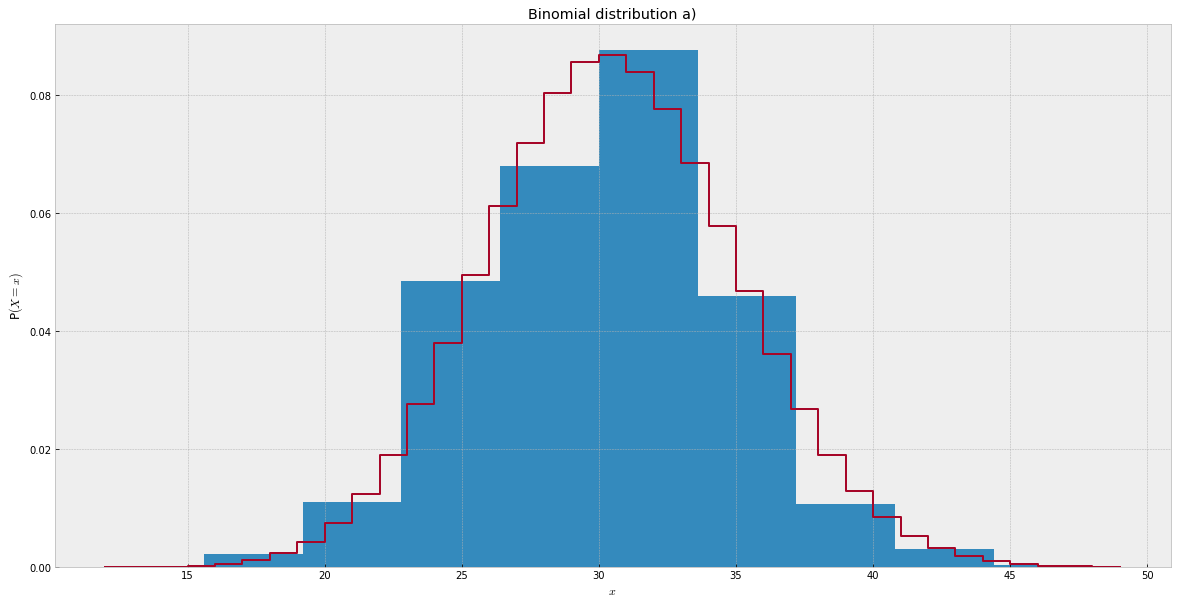

In [15]:
list1 = np.zeros([10001,1])
list2 = np.zeros([10001,1])

n = np.arange(100)
for i in range(0,10001):
    list1[i] = np.random.binomial(100,0.3)
    
for i in range(0,10001):
    list2[i] = np.random.binomial(10000,0.6)

x1 = np.arange(binom.ppf(0.00001, 100, 0.3),binom.ppf(0.99999, 100, 0.3))  
plt.figure(figsize=(20,10))
plt.hist(list1,density=True)

plt.step(x1,binom.pmf(x1,100,0.3), where='post')
plt.xlabel('$x$')
plt.ylabel('P$(X = x)$')
plt.title('Binomial distribution a)')
plt.show() 


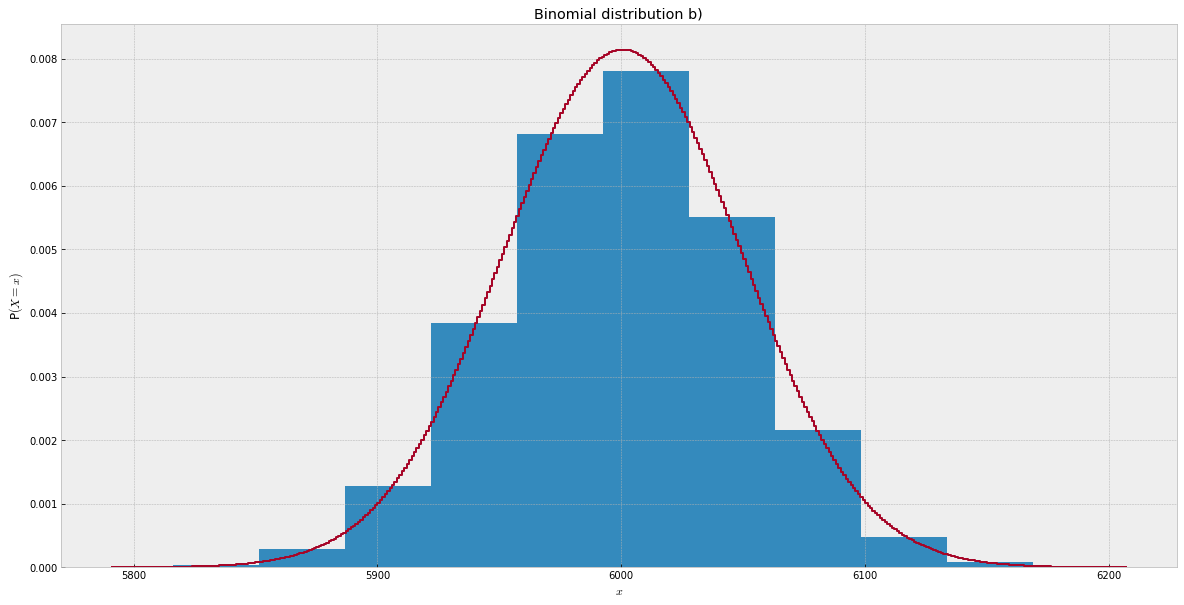

In [16]:
x2 = np.arange(binom.ppf(0.00001, 10000, 0.6),binom.ppf(0.99999, 10000, 0.6))
plt.figure(figsize=(20,10))
plt.hist(list2,density=True)
plt.step(x2,binom.pmf(x2,10000,0.6), where='post')
plt.xlabel('$x$')
plt.ylabel('P$(X = x)$')
plt.title('Binomial distribution b)')
plt.show() 

**(2) Read Section 2.3 and Chapter 3 from [Network Science](http://networksciencebook.com/) and generate three different kinds of Erdos-Renyi graphs with $N=15$ (fifteen nodes) using [NetworkX](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html?highlight=erdos#networkx.generators.random_graphs.erdos_renyi_graph). 
The networks shall be (a)  with probability $p=0.2$, (b) with probability $p=0.5$ and (c) with probability $p=0.8$. Discuss about the differences you see if these graphs represent communication networks.**

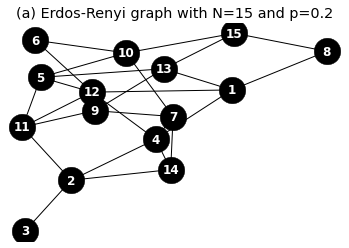

In [17]:
def random(p):
    return 1 if np.random.random() < p else 0
p=0.2
n=15 
T = nx.Graph()
for i in range(1,n+1):
    for j in range(i,n+1):
        if random(p) == 1:
            T.add_edge(i, j)

    

nx.draw_networkx(T, node_color='black', font_color='white', edge_color='black', font_weight='bold',  node_size=700)
plt.title('(a) Erdos-Renyi graph with N=15 and p=0.2')
plt.axis('off')
plt.show()

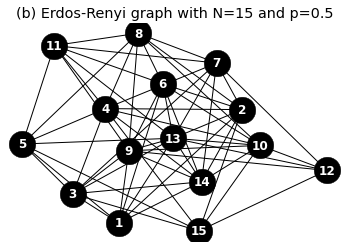

In [18]:
T = nx.Graph()
p=0.5
n=15
for i in range(1,n+1):
    for j in range(i,n+1):
        if random(p) == 1:
            T.add_edge(i, j)
    
nx.draw_networkx(T, node_color='black', font_color='white', edge_color='black', font_weight='bold',  node_size=700)
plt.title('(b) Erdos-Renyi graph with N=15 and p=0.5')
plt.axis('off')
plt.show()

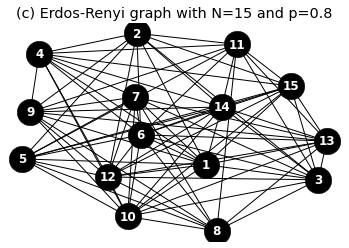

In [19]:
T = nx.Graph()
p=0.8
n=15

for i in range(1,n+1):
    for j in range(i,n+1):
        if random(p) == 1:
            T.add_edge(i, j)
    
nx.draw_networkx(T, node_color='black', font_color='white', edge_color='black', font_weight='bold',  node_size=700)
plt.title('(c) Erdos-Renyi graph with N=15 and p=0.8')
plt.axis('off')
plt.show()

If these random networks represent communication networks the biggest differences between these networks is connectivity and reliability. The more links between nodes are, more connected the nodes are to each other and higher the degree of the network is. C networks is the most connected information can spread quickly in the network but has the problem of the many to one that could affect some nodes. B network has its links pretty evenly distributed, it is well connected but information has to go through more links compared to C. Network A has the problem that some nodes have just one link making communication with it hard. C is the most reliable while A being the most unreliable. In C if couple of links disconnect the nodes are still well connected, but in A there some on link connections between noses, so if the link disconnects the node disconnects from the network. The B network is like C just fewer connection, but still better than A.